# Pipeline

## Importing Libraries

In [159]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, IsolationForest
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

# Hyperparameter Tuning
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from catboost import Pool, CatBoostRegressor, cv


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
warnings.filterwarnings('ignore')
    
import os
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [160]:
df = pd.read_csv('newest_dataset.csv')
new_df = pd.read_csv('data_set.csv')

In [161]:
df.columns

Index(['features', 'monthly_sale', 'monthly_sale.1', 'monthly_sale.2',
       'monthly_sale.3', 'monthly_sale.4', 'monthly_sale.5', 'monthly_sale.6',
       'monthly_sale.7', 'monthly_sale.8', 'monthly_sale.9', 'monthly_sale.10',
       'monthly_sale.11', 'monthly_sale.12', 'monthly_sale.13',
       'monthly_sale.14', 'monthly_sale.15', 'monthly_sale.16',
       'monthly_sale.17', 'monthly_invoice', 'monthly_invoice.1',
       'monthly_invoice.2', 'monthly_invoice.3', 'monthly_invoice.4',
       'monthly_invoice.5', 'monthly_invoice.6', 'monthly_invoice.7',
       'monthly_invoice.8', 'monthly_invoice.9', 'monthly_invoice.10',
       'monthly_invoice.11', 'monthly_invoice.12', 'monthly_invoice.13',
       'monthly_invoice.14', 'monthly_invoice.15', 'monthly_invoice.16',
       'monthly_invoice.17', 'monthly_customer', 'monthly_customer.1',
       'monthly_customer.2', 'monthly_customer.3', 'monthly_customer.4',
       'monthly_customer.5', 'monthly_customer.6', 'monthly_customer.7',
  

In [162]:
new_df.columns

Index(['Unnamed: 0', 'main_code', 'pure_amount', 'economic_percentage',
       'tasvie_time', 'discount_precentage', 'count', 'current_sale',
       'min_count', 'max_count', 'last_purchase_price', 'price', 'publisher',
       'suggested', 'mean', 'm5', 'A/G'],
      dtype='object')

In [163]:
df.rename(columns = {'monthly_sale' : 'monthly_sale.0'}, inplace = True)
df.rename(columns = {'monthly_invoice' : 'monthly_invoice.0'}, inplace = True)
df.rename(columns = {'monthly_customer' : 'monthly_customer.0'}, inplace = True)
df.rename(columns = {'features' : 'main_code'}, inplace = True)

In [164]:
targetInput = input("Please Enter Your Target")
targetString = 'monthly_sale.' + targetInput

Please Enter Your Target 17


In [165]:
target = df[targetString] 
df.drop([targetString], axis=1, inplace=True)
df['target'] = target

In [166]:
df.drop([0],axis=0,inplace=True)
new_df = new_df.drop(['Unnamed: 0'], axis=1)
df = df.astype({'main_code': 'float'})

### We need some external features

In [167]:
df = df.merge(new_df, on='main_code')

In [168]:
df = df.drop(['main_code'], axis=1)
df = df.astype({'pure_amount': 'float'})
df['price'] = df['price'].str.replace(',', '')
df = df.astype({'price': 'float'})
df = df.astype({'price': 'float'})

### Around 5000 of 7000 of rows have target = 0! So we can drop some of them

In [169]:
df = df.sort_values(by=['target'], ascending=False)
df = df.head(4000)

In [170]:
print(f'Shape of our Dataset:{df.shape}')
print(f'Types of data that is available in our Dataset:{list(set(df.dtypes.tolist()))}')
print('\nTarget Describe:')
print(df['target'].describe())

Shape of our Dataset:(4000, 69)
Types of data that is available in our Dataset:[dtype('int64'), dtype('O'), dtype('float64')]

Target Describe:
count    4000.000000
mean        5.562250
std        50.326159
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max      3008.000000
Name: target, dtype: float64


array([[<AxesSubplot:title={'center':'monthly_sale.0'}>,
        <AxesSubplot:title={'center':'monthly_sale.1'}>,
        <AxesSubplot:title={'center':'monthly_sale.2'}>,
        <AxesSubplot:title={'center':'monthly_sale.3'}>,
        <AxesSubplot:title={'center':'monthly_sale.4'}>,
        <AxesSubplot:title={'center':'monthly_sale.5'}>,
        <AxesSubplot:title={'center':'monthly_sale.6'}>,
        <AxesSubplot:title={'center':'monthly_sale.7'}>],
       [<AxesSubplot:title={'center':'monthly_sale.8'}>,
        <AxesSubplot:title={'center':'monthly_sale.9'}>,
        <AxesSubplot:title={'center':'monthly_sale.10'}>,
        <AxesSubplot:title={'center':'monthly_sale.11'}>,
        <AxesSubplot:title={'center':'monthly_sale.12'}>,
        <AxesSubplot:title={'center':'monthly_sale.13'}>,
        <AxesSubplot:title={'center':'monthly_sale.14'}>,
        <AxesSubplot:title={'center':'monthly_sale.15'}>],
       [<AxesSubplot:title={'center':'monthly_sale.16'}>,
        <AxesSubplot:t

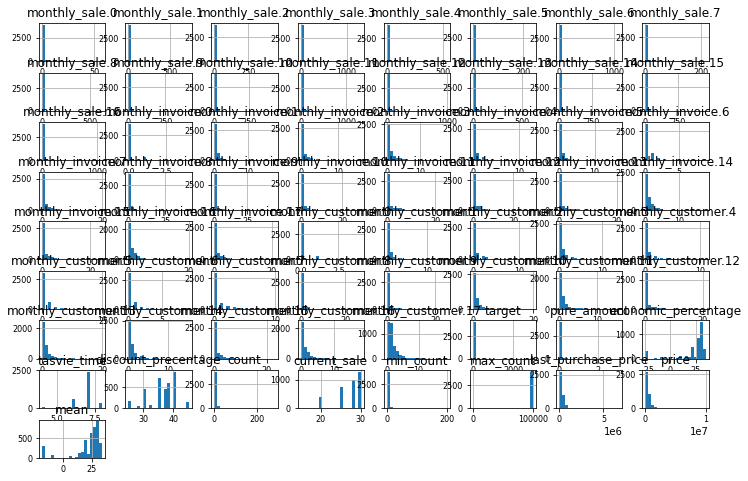

In [171]:
df.hist(figsize=(12, 8), bins=20, xlabelsize=8, ylabelsize=8)

### Identify categorical features

In [172]:
categorical_columns_selector = selector(dtype_include= 'object') 
categorical_columns = categorical_columns_selector(df)
categorical_columns

['publisher', 'suggested', 'm5', 'A/G']

In [173]:
df['suggested'] = df['suggested'].str.replace('-', '0')
df['suggested'] = df['suggested'].str.replace('', '0')
df = df.astype({'suggested': 'float'})

### Encoding categorical features

In [174]:
le = LabelEncoder()
df['publisher'] = le.fit_transform(df['publisher'].astype(str))

In [175]:
ordinal = ["A/G", "m5"]

for col in ordinal:
    print(col)
    print(df[col].unique())

A/G
['امانی' nan]
m5
['تضميني' 'تاميني' nan]


<AxesSubplot:xlabel='m5', ylabel='count'>

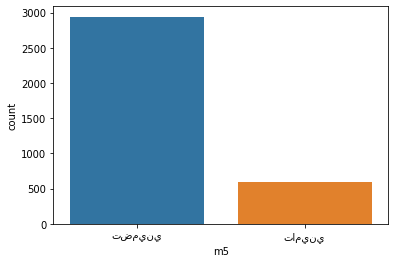

In [176]:
sns.countplot(df.m5)

In [177]:
df["m5"] = df["m5"].fillna("تضميني")
df['A/G'] = df['A/G'].fillna("قطعی")

In [178]:
ordinal_list = ['A/G', 'm5']
AGlist =  ['امانی', 'قطعی']
m5list = ['تاميني','تضميني']

encoder = OrdinalEncoder(categories=[AGlist, m5list])
tmp = pd.DataFrame(encoder.fit_transform(df[ordinal_list]), columns=(ordinal_list))

In [179]:
df['A/G'] = tmp['A/G']
df['m5'] = tmp['m5']

In [180]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('int32')]

### Here we can see that the encoding was succesfull

In [181]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
A/G,2571,0.64275
m5,2571,0.64275
current_sale,618,0.15450
suggested,459,0.11475
tasvie_time,453,0.11325


### We have some missing values that should be handled!

In [182]:
df = df.fillna(0)

In [183]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
monthly_sale.0,0,0.0
monthly_customer.9,0,0.0
monthly_customer.15,0,0.0
monthly_customer.14,0,0.0
monthly_customer.13,0,0.0


#### Imputing with zero had the best result according to the tests i have tried 

### Analysing the Target column

<IPython.core.display.Javascript object>

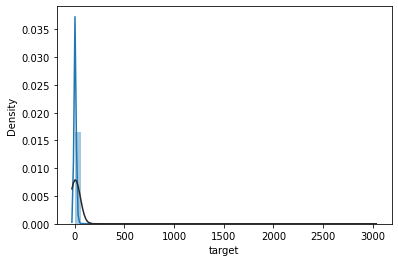

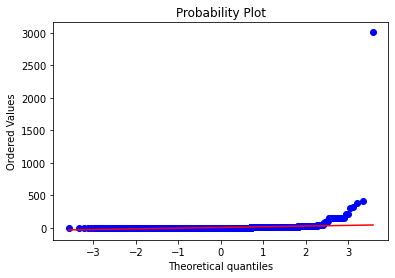

In [184]:
#histogram and normal probability plot
sns.distplot(df['target'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)

In [185]:
# Skew and kurt
print("Skewness: %f" % df['target'].skew())
print("Kurtosis: %f" % df['target'].kurt())

Skewness: 53.600500
Kurtosis: 3172.458214


#### Bad ditribution!

In [186]:
# log(1+x) transform
df["target"] = np.log1p(df["target"])

<IPython.core.display.Javascript object>

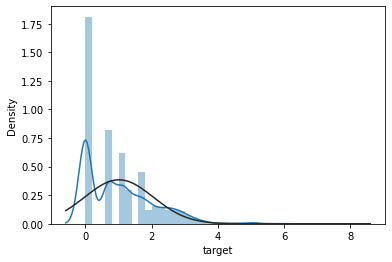

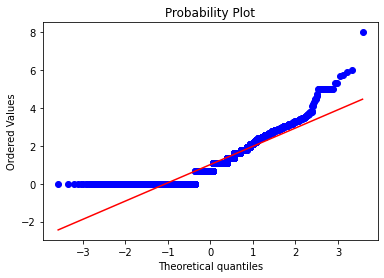

In [187]:
#histogram and normal probability plot
sns.distplot(df['target'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)

In [188]:
# Skew and kurt
print("Skewness: %f" % df['target'].skew())
print("Kurtosis: %f" % df['target'].kurt())

Skewness: 1.022403
Kurtosis: 1.187520


#### Became more normal. Not bad!

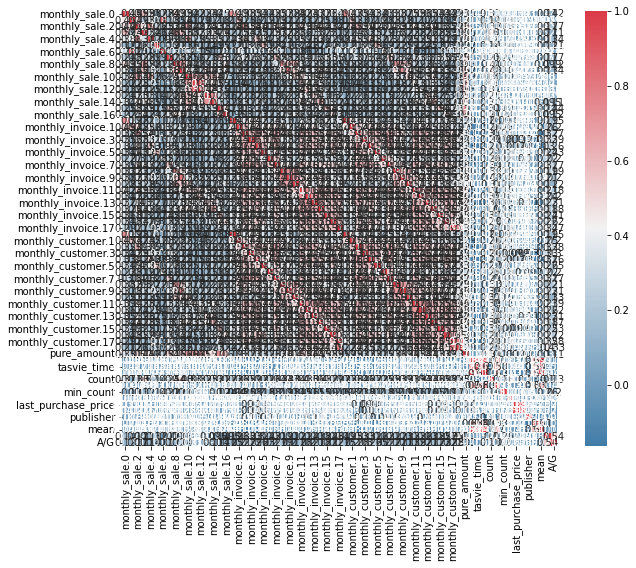

In [189]:
def detailed_correlation_matrix(dataset):
    f, ax = plt.subplots(figsize=(10,8))
    corr = dataset.corr()
    sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
               cmap = sns.diverging_palette(240, 10, as_cmap = True), 
               square = True, ax = ax)

detailed_correlation_matrix(df)

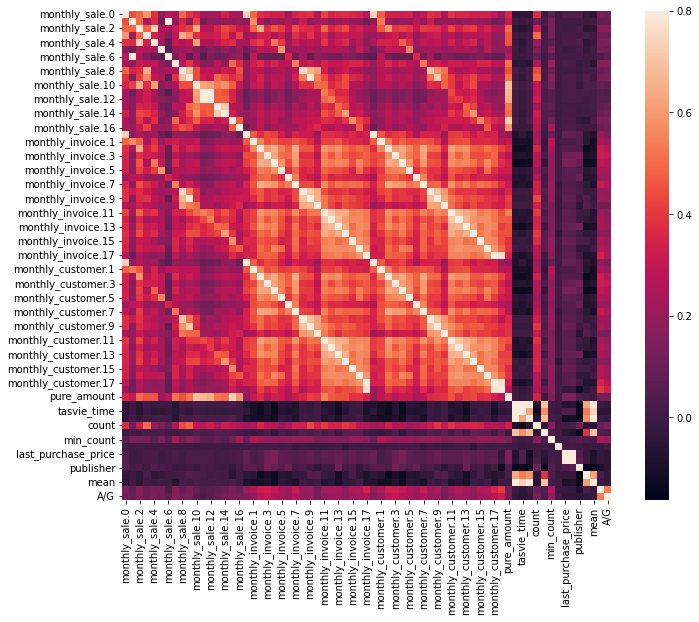

In [190]:
def colored_correlation_matrix(dataset):
    #correlation matrix
    corrmat = dataset.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, square=True);
    
colored_correlation_matrix(df)

#### The data is not normally distributed. Here I found the features that are more skewd and then try to normalize them.

In [191]:
def fetch_numeric_features(dataset):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes:
            numeric.append(i)
    return numeric

numeric = fetch_numeric_features(df)

In [192]:
def find_skewed_numerical_features(dataset, numeric_features, threshold):
    skew_features = dataset[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skew_features[abs(skew_features) > threshold]
    skew_index = high_skew.index
    skewness = pd.DataFrame({'Skew' :high_skew})
    return skew_index
    
skew_index = find_skewed_numerical_features(df, numeric, 5)
skew_index

Index(['monthly_sale.6', 'monthly_sale.3', 'monthly_sale.1', 'monthly_sale.11',
       'monthly_sale.16', 'monthly_sale.12', 'monthly_sale.4',
       'monthly_sale.8', 'pure_amount', 'monthly_sale.14', 'monthly_sale.15',
       'monthly_sale.2', 'monthly_sale.13', 'monthly_sale.10',
       'monthly_sale.9', 'monthly_sale.0', 'monthly_sale.5', 'min_count',
       'monthly_sale.7', 'count', 'monthly_invoice.8', 'monthly_invoice.9',
       'monthly_customer.8', 'monthly_invoice.10', 'last_purchase_price',
       'monthly_customer.9', 'price', 'monthly_invoice.5',
       'monthly_customer.10', 'max_count'],
      dtype='object')

In [193]:
# Normalize skewed features
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

#### All our predictions is based on last 12 month. So Here I split them.

In [194]:
def split_12_last_months(target):
    wantedColumns = []
    start = target - 12
    for i in range(start, target):
        i = str(i)
        wantedColumns.append('monthly_sale.'+ i)
        wantedColumns.append('monthly_invoice.'+ i)
        wantedColumns.append('monthly_customer.'+ i) 
    return wantedColumns

targetNo = int(input())
wantedColumns = split_12_last_months(targetNo)

wantedColumns.extend(['pure_amount', 'economic_percentage', 'tasvie_time',
       'discount_precentage', 'count', 'current_sale', 'min_count',
       'max_count', 'last_purchase_price', 'price', 'publisher', 'suggested',
       'mean', 'm5', 'A/G', 'target'])

 17


In [197]:
wantedColumns

['monthly_sale.5',
 'monthly_invoice.5',
 'monthly_customer.5',
 'monthly_sale.6',
 'monthly_invoice.6',
 'monthly_customer.6',
 'monthly_sale.7',
 'monthly_invoice.7',
 'monthly_customer.7',
 'monthly_sale.8',
 'monthly_invoice.8',
 'monthly_customer.8',
 'monthly_sale.9',
 'monthly_invoice.9',
 'monthly_customer.9',
 'monthly_sale.10',
 'monthly_invoice.10',
 'monthly_customer.10',
 'monthly_sale.11',
 'monthly_invoice.11',
 'monthly_customer.11',
 'monthly_sale.12',
 'monthly_invoice.12',
 'monthly_customer.12',
 'monthly_sale.13',
 'monthly_invoice.13',
 'monthly_customer.13',
 'monthly_sale.14',
 'monthly_invoice.14',
 'monthly_customer.14',
 'monthly_sale.15',
 'monthly_invoice.15',
 'monthly_customer.15',
 'monthly_sale.16',
 'monthly_invoice.16',
 'monthly_customer.16',
 'pure_amount',
 'economic_percentage',
 'tasvie_time',
 'discount_precentage',
 'count',
 'current_sale',
 'min_count',
 'max_count',
 'last_purchase_price',
 'price',
 'publisher',
 'suggested',
 'mean',
 'm5'

In [198]:
df = df[wantedColumns]

### Extraction Seosenal and Yearly features

In [200]:
def add_seasonal_features(target):
    intStartInput = target - 11

    df['first_season_sale'] = df['monthly_sale.' + str(intStartInput)] + df['monthly_sale.' + str(intStartInput+1)] + df['monthly_sale.' + str(intStartInput+2)]
    df['second_season_sale'] = df['monthly_sale.' + str(intStartInput + 3)] + df['monthly_sale.' + str(intStartInput+4)] + df['monthly_sale.' + str(intStartInput+5)]
    df['third_season_sale'] = df['monthly_sale.' + str(intStartInput + 6)] + df['monthly_sale.' + str(intStartInput+7)] + df['monthly_sale.' + str(intStartInput+8)]
    df['forth_season_sale'] = df['monthly_sale.' + str(intStartInput + 9)] + df['monthly_sale.' + str(intStartInput+10)] 
    df['yearly_sale'] = df['first_season_sale'] + df['second_season_sale'] + df['third_season_sale'] +df['forth_season_sale']

    df['first_season_customer'] = df['monthly_customer.'+ str(intStartInput)] + df['monthly_customer.'+ str(intStartInput+1)] + df['monthly_customer.'+ str(intStartInput+2)]
    df['second_season_customer'] = df['monthly_customer.'+ str(intStartInput+3)] + df['monthly_customer.'+ str(intStartInput+4)] + df['monthly_customer.'+ str(intStartInput+5)]
    df['third_season_customer'] = df['monthly_customer.'+ str(intStartInput+6)] + df['monthly_customer.' +str(intStartInput+7)] + df['monthly_customer.'+ str(intStartInput+8)]
    df['forth_season_customer'] = df['monthly_customer.'+ str(intStartInput+9)] + df['monthly_customer.'+ str(intStartInput+10)] 
    df['yearly_customer'] = df['first_season_customer'] + df['second_season_customer'] + df['third_season_customer'] +df['forth_season_customer']

    df['first_season_invoice'] = df['monthly_invoice.'+ str(intStartInput)] + df['monthly_invoice.'+ str(intStartInput+1)] + df['monthly_invoice.'+ str(intStartInput+2)]
    df['second_season_invoice'] = df['monthly_invoice.'+ str(intStartInput+3)] + df['monthly_invoice.'+ str(intStartInput+4)] + df['monthly_invoice.'+ str(intStartInput+5)]
    df['third_season_invoice'] = df['monthly_invoice.'+ str(intStartInput+6)] + df['monthly_invoice.' +str(intStartInput+7)] + df['monthly_invoice.'+ str(intStartInput+8)]
    df['forth_season_invoice'] = df['monthly_invoice.'+ str(intStartInput+9)] + df['monthly_invoice.'+ str(intStartInput+10)] 
    df['yearly_invoice'] = df['first_season_invoice'] + df['second_season_invoice'] + df['third_season_invoice'] +df['forth_season_invoice']
    
    return df

targetNo = int(input())
df = add_seasonal_features(targetNo)

 17


### Droping unnecessary columns

In [201]:
def drop_unnecessary_columns(dataset, target):
    search = target - 3
    finalColumns = []
    changingColumsn = []

    changingColumsn.append('monthly_sale.' + str(int(target)-12)) 
    changingColumsn.extend(['monthly_sale.'+ str(i) for i in range(search, int(target))])
    changingColumsn.append('monthly_invoice.' + str(int(targetInput)-12)) 
    changingColumsn.extend(['monthly_invoice.'+ str(i) for i in range(search, int(target))])
    changingColumsn.append('monthly_customer.' + str(int(targetInput)-12)) 
    changingColumsn.extend(['monthly_customer.'+ str(i) for i in range(search, int(target))])

    constantColumns = ['pure_amount', 'economic_percentage', 'tasvie_time',
           'discount_precentage', 'count', 'current_sale', 'min_count',
           'max_count', 'last_purchase_price', 'price', 'publisher', 'suggested',
           'mean', 'm5', 'A/G', 'first_season_sale', 'second_season_sale',
           'third_season_sale', 'forth_season_sale', 'yearly_sale',
           'first_season_customer', 'second_season_customer',
           'third_season_customer', 'forth_season_customer', 'yearly_customer',
           'first_season_invoice', 'second_season_invoice', 'third_season_invoice',
           'forth_season_invoice', 'yearly_invoice', 'target']

    finalColumns.extend(changingColumsn)
    finalColumns.extend(constantColumns)
    
    return dataset[finalColumns]

targetNo = int(input())
df = drop_unnecessary_columns(df,targetNo)
df.columns

 17


Index(['monthly_sale.5', 'monthly_sale.14', 'monthly_sale.15',
       'monthly_sale.16', 'monthly_invoice.5', 'monthly_invoice.14',
       'monthly_invoice.15', 'monthly_invoice.16', 'monthly_customer.5',
       'monthly_customer.14', 'monthly_customer.15', 'monthly_customer.16',
       'pure_amount', 'economic_percentage', 'tasvie_time',
       'discount_precentage', 'count', 'current_sale', 'min_count',
       'max_count', 'last_purchase_price', 'price', 'publisher', 'suggested',
       'mean', 'm5', 'A/G', 'first_season_sale', 'second_season_sale',
       'third_season_sale', 'forth_season_sale', 'yearly_sale',
       'first_season_customer', 'second_season_customer',
       'third_season_customer', 'forth_season_customer', 'yearly_customer',
       'first_season_invoice', 'second_season_invoice', 'third_season_invoice',
       'forth_season_invoice', 'yearly_invoice', 'target'],
      dtype='object')

In [202]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = df.columns.tolist()
# log_features.pop()
# df = logs(df, log_features)

### Creating more features.

In [203]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

df = squares(df, df.columns.tolist())

### Remove any duplicated column names

In [204]:
df = df.loc[:,~df.columns.duplicated()]

#### Creating Has Columns (If has any sale or ..., its value is 1 if not it is 0)

In [205]:
hasColumns = []
search = int(targetInput) - 3
hasColumns.append('monthly_sale.' + str(int(targetInput)-12)) 
hasColumns.append('monthly_invoice.' + str(int(targetInput)-12)) 
hasColumns.append('monthly_customer.' + str(int(targetInput)-12)) 
hasColumns.extend(['monthly_sale.'+ str(i) for i in range(search, int(targetInput))])

In [206]:
def add_has_columns(dataset, hasColumns):
    for i in hasColumns:
        dataset['has_'+ i] = dataset[i].apply(lambda x: 1 if x > 0 else 0)
    return dataset

df = add_has_columns(df,hasColumns)

In [207]:
df.columns

Index(['monthly_sale.5', 'monthly_sale.14', 'monthly_sale.15',
       'monthly_sale.16', 'monthly_invoice.5', 'monthly_invoice.14',
       'monthly_invoice.15', 'monthly_invoice.16', 'monthly_customer.5',
       'monthly_customer.14', 'monthly_customer.15', 'monthly_customer.16',
       'pure_amount', 'economic_percentage', 'tasvie_time',
       'discount_precentage', 'count', 'current_sale', 'min_count',
       'max_count', 'last_purchase_price', 'price', 'publisher', 'suggested',
       'mean', 'm5', 'A/G', 'first_season_sale', 'second_season_sale',
       'third_season_sale', 'forth_season_sale', 'yearly_sale',
       'first_season_customer', 'second_season_customer',
       'third_season_customer', 'forth_season_customer', 'yearly_customer',
       'first_season_invoice', 'second_season_invoice', 'third_season_invoice',
       'forth_season_invoice', 'yearly_invoice', 'target', 'monthly_sale.5_sq',
       'monthly_sale.14_sq', 'monthly_sale.15_sq', 'monthly_sale.16_sq',
       'mon

In [208]:
target = df['target'] 
df.drop(['target'], axis=1, inplace=True)
df.drop(['target_sq'], axis=1, inplace=True)
df['target'] = target

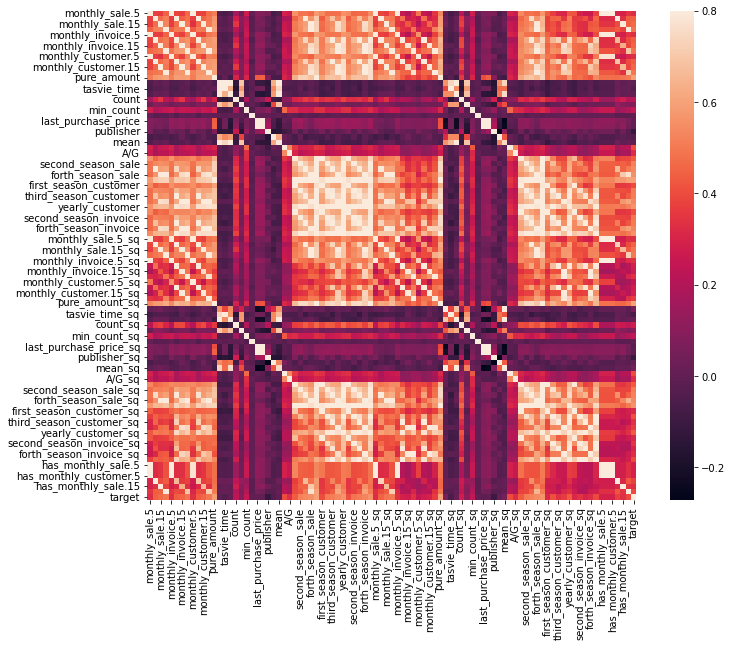

In [209]:
colored_correlation_matrix(df)

#### This function returns most correlated features to the target columns with the given threshold

In [210]:
def get_correlated_features_to_target(dataset,threshold):
    corr = dataset.corr()
    return corr[corr['target']>threshold].index
    
get_correlated_features_to_target(df,0.4)

Index(['monthly_sale.14', 'monthly_sale.15', 'monthly_sale.16',
       'monthly_invoice.14', 'monthly_invoice.15', 'monthly_invoice.16',
       'monthly_customer.14', 'monthly_customer.15', 'monthly_customer.16',
       'pure_amount', 'm5', 'first_season_sale', 'second_season_sale',
       'third_season_sale', 'forth_season_sale', 'yearly_sale',
       'second_season_customer', 'third_season_customer',
       'forth_season_customer', 'yearly_customer', 'first_season_invoice',
       'second_season_invoice', 'third_season_invoice', 'forth_season_invoice',
       'yearly_invoice', 'monthly_sale.14_sq', 'monthly_sale.15_sq',
       'monthly_sale.16_sq', 'pure_amount_sq', 'm5_sq', 'first_season_sale_sq',
       'second_season_sale_sq', 'third_season_sale_sq', 'forth_season_sale_sq',
       'yearly_sale_sq', 'second_season_customer_sq', 'yearly_customer_sq',
       'target'],
      dtype='object')

#### find and remove correlated features

In [211]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.95)
print('correlated features: ', len(set(corr_features)) )
# df.drop(labels=corr_features, axis=1, inplace=True)

correlated features:  31


#### Finding and Droping overfitted features

In [212]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(df)
overfitted_features

['max_count', 'max_count_sq']

In [213]:
df.drop(overfitted_features,axis=1, inplace=True )

In [214]:
def pick_k_most_target_correlated(df,k,targetName):
    plt.figure(figsize=(16,8))
    corrmat = df.corr()
    cols = corrmat.nlargest(k, targetName)[targetName].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
# pick_k_most_target_correlated(df,70,'target')

#### Anomaly detection using Isolation Forest

In [215]:
def anomaly_detection(dataset):
    model =  IsolationForest(n_estimators=50)
    dataset['anomaly'] = model.fit_predict(df)
    dataset['label'] = np.where(df['anomaly']==-1, 1, 0)
    normal = df[df['label'] == 0]
    anomalies = df[df['label'] == 1]
    normal = normal.drop(columns=['anomaly', 'label']) 
    return normal

## Model Training

In [216]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [217]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [218]:
X.shape, y.shape

((4000, 88), (4000,))

In [219]:
def grid_search():
    params = { 'max_depth': [3,6,10],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [100, 500, 1000],
            'colsample_bytree': [0.3, 0.7]}
    xgbr = xgb.XGBRegressor(seed = 20)
    clf = GridSearchCV(estimator=xgbr, 
            param_grid=params,
            scoring='neg_mean_squared_error', 
            verbose=1)
    clf.fit(X, train_labels)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

#### This methos returns a list of most important features

In [220]:
def perform_model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42)

    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                        random_state=52)
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=400,
    )
    
    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y)))),columns=['Feature','Score'])
    feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
    return feature_score

In [221]:
X, x_test, train_labels, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [222]:
X.shape, x_test.shape, train_labels.shape, y_test.shape

((3200, 88), (800, 88), (3200,), (800,))

### Define error metrics


In [223]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

def r2Score(y, y_pred):
    r2_score(y , regr.predict(test))

In [224]:
#Linear Regressor
lm = LinearRegression()

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

<IPython.core.display.Javascript object>

In [225]:
# xgboost hyper parameter tuning

def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =int(space['n_estimators']), 
                    max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    reg_lambda =int(space['reg_lambda']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = mean_squared_error(y_test,pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }
    
def hyperparameter_tuning():
    space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
            'gamma': hp.uniform ('gamma', 1,9),
            'reg_alpha' : hp.quniform('reg_alpha', 50,150,1),
            'reg_lambda' : hp.quniform('reg_lambda', 40,100,1),
            'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
            'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
            'n_estimators': hp.quniform('n_estimators',5000,10000,1000),
            'tree_method':'gpu_hist',
            'subsample': hp.uniform('subsample', 0,1),
            'learning_rate': hp.uniform('learning_rate',0.000001,1),
            'seed': 0
        }

    trials = Trials()

    best_hyperparams = fmin(fn = objective,
                            space = space,
                            algo = tpe.suggest,
                            max_evals = 10,
                            trials = trials)

    return best_hyperparams

In [226]:
# model = xgb.XGBRegressor(**best_hyperparams)

In [227]:
scores = {}
r2_scores = {}

In [228]:
# print('Linear_regression')
# lr = lm.fit(X,train_labels)
# r2_scores['Linear_regression'] = r2_score(y_test , lr.predict(x_test))
# r2_scores['Linear_regression']

In [229]:
# print('lightgbm')
# lgb_model_full_data = lightgbm.fit(X, train_labels)
# r2_scores['lightgbm'] = r2_score(y_test , lgb_model_full_data.predict(x_test))
# r2_scores['lightgbm'] 

In [230]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)
r2_scores['xgboost'] = r2_score(y_test , xgb_model_full_data.predict(x_test))
r2_scores['xgboost'] #0.5551
# before hyperparamete tuning and feature importance : 0.5558101834879838

xgboost
[00:54:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


0.7064954743274998

In [231]:
# print('Svr')
# svr_model_full_data = svr.fit(X, train_labels)
# r2_scores['Svr'] = r2_score(y_test , svr_model_full_data.predict(x_test))
# r2_scores['Svr'] #0.3319

In [232]:
# print('Ridge')
# ridge_model_full_data = ridge.fit(X, train_labels)
# r2_scores['Ridge'] = r2_score(y_test , ridge_model_full_data.predict(x_test))
# r2_scores['Ridge']

In [233]:
# print('RandomForest')
# rf_model_full_data = rf.fit(X, train_labels)
# r2_scores['RandomForest'] = r2_score(y_test , rf_model_full_data.predict(x_test))
# r2_scores['RandomForest']

In [234]:
# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, train_labels)
# r2_scores['GradientBoosting'] = r2_score(y_test , gbr_model_full_data.predict(x_test))
# r2_scores['GradientBoosting']

In [235]:
# print('stack_gen')
# stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))
# r2_scores['stack_gen'] = r2_score(y_test , stack_gen_model.predict(x_test))
# r2_scores['stack_gen']

In [236]:
# # Blend models in order to make the final predictions more robust to overfitting
# def blended_predictions(X):
#     return ((0.1 * ridge_model_full_data.predict(X)) + \
#             (0.01 * gbr_model_full_data.predict(X)) + \
#             (0.65 * xgb_model_full_data.predict(X)) + \
#             (0.01 * lgb_model_full_data.predict(X)) + \
#             (0.30 * rf_model_full_data.predict(X)))
#             # (0.6 * stack_gen_model.predict(np.array(X))))

In [237]:
# # Get final precitions from the blended model
# blended_score = rmsle(train_labels, blended_predictions(X))
# # scores['blended'] = (blended_score, 0)
# # print('RMSLE score:')
# # print(blended_score)
# r2_scores['blended_model'] = r2_score(y_test , blended_predictions(x_test))
# print('R2 score:')
# print(r2_scores['blended_model'])

In [154]:
r2_scores

## Summery of Results

Target = 17 :  'xgboost': 0.655210800906816

Target = 17 :  'xgboost':0.7064954743274998 -  By removing some rows that their target is 0 

Target = 16:   'xgboost': 0.662268458322304

Target = 15:   'xgboost': 0.6631498024815605 

Target = 14:   'xgboost': 0.6156444761382583

Target = 13:   'xgboost': 0.6603079672979484

Target = 12:   'xgboost': 0.6417318736343796

Target = 12:   'xgboost': 0.7360580021791936 - By removing some rows that their target is 0 

Target = 12:   'xgboost': 0.7561941532137844 - By adding 'has' features